# Statistics and Machine Learning for Experimental Physiscs

## Machine Learning
- Machine learning is the science of making computers learn and act like humans by feeding data and information without being explicitly programmed.

```text
             Train          Prediction
[Past Data] <----> [System] ----------> [Output]
            Analysis
Data is             System              Machine Learning makes
Processed           Learns              predictions and decisions
                                        based on Past Data
```
---
- This is of two types.

### Supervised
- The process of learning with training labels. 
- It has a feedback mechanism.
- Most commonly used
    - 1) Decision Tree
    - 2) Logistic Regression
    - 3) Support Vector Machine

- Used in 
    - 1) Risk Assesment 
    - 2) Image Classification
    - 3) Fraud Detection
    - 4) Visual Recognition

- 1) Classification
    - When the output variable is catagorical; i.e. with two or more classes (yex/no, true/false), we make use of classification.
    - e.g. spam filters
- 2) Regression
    - Relationship of two or more variables where a change in one variable is associated with a change in another variable.
    - e.g. having a prediction of humidity with temperature based of past data 
---

### Unsupervised
- The process of learning without training labels. 
- Has no feedback mechanism.
- Most commoly used
    - 1) k Means Clustering
    - 2) Hierarchical Clustering 
    - 3) Apriori Algorithm

- Used in 
    - 1) Market Basket Analysis
    - 2) Semantic Clustering 
    - 3) Delivery Store Optimization

- 1) Clustering
    - A method of dividing objects into data clusters which are similar between them and are dissimilar between the objects belonging to another cluster.
- 2) Association
    - Discovering the probability of the co-occurance of items in a collection.
- 3) Dimentional Reduction
---


## Support Vector Machine
- Basic Usage
    - 1) Face Detection
    - 2) Text and Hypertext Catagorization
    - 3) Classification of Images
    - 4) Bioinformatics

- SVM is a supervised learning method that looks at data and sorts it into one of the two catagories.
- We are given a data set. Let be Male and Female (based on height and weight)
- Now to take a new data and catagorize it into one of the two classification we need to fisrt split our data. 
- Now imagine the data as a plot of the weight and height where the males have a group and the females have a group.

<img src="SVM_1.png" width = 500>

- To split this we should use a line that separates the data in the best possible way.
- To do that fist device some basic terminology.

<img src="SVM_2.png" width = 500><img src="SVM_3.png" width = 500>

- In technical term the distance between the **support vector** and the **hyperplane** should be as far as possible.
    - **Support vectors** are the extreme points of the datasets.

- In mathematical terms we take `D+` the shortest distance to the closest positive point and `D-` the shortest distance to the closest negative point. The sum of D+ and D- is called the **distance margin**.
- Then from the largest **distance margin** we get the **optimal hyperplane**.
- If we select a hyperplane having low margin then there is high chance of missclassification.

- What we discussed so far is also called **LSVM**.

- But What if the some data points are in between another datapoints.
    - Then we cannot use a hyperplane. 
    - Then we use transformation ([input](1d or 2d) ---> [Kernel] ---> [output](2d or 3d)) to convert the data from say 1d to 2d or 2d to 3d to introdyce a hyperplane.

    <img src = "SVM_4.png" width = 500>
    <img src = "SVM_5.png" width = 500>

### Advantages of Support Vector Machine
- 1) High Dimensional Input Space
- 2) Sparce Document Vectors
- 3) Regularization Parameters

### Use Case - Implementation

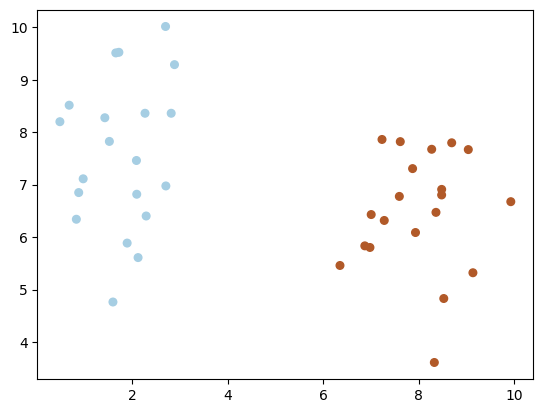

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=20)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)
plt.show()

In [76]:
# Using to predict unknown data
new_data = [[0,2], [3,2], [5,6]]
print(clf.predict(new_data))

[0 1 1]


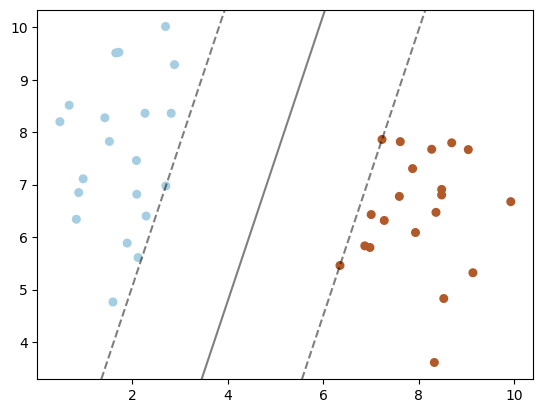

In [77]:
# fit the model don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)

plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vecotrs
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], s=100, linewidth = 1, facecolors = 'none')
plt.show()

## Linear Regression
- Linear regression is a statistical model used to predict the relationship between independent and dependent variables.
- Here we examine 2 factors
    - 1) Which variables in particular are significant predictors of the outcome vairable.
    - 2) How significant is the regression line to make predictions with highest possible accuracy.

### Regression Equation
- The simplest form of a simple linear regression equation with one dependent and one independent variable is represented by 
$$ Y = m*x + c$$
- Y -> dependent vaiable
- x -> independent vairable
- m -> slope of the line
- c -> coefficient of the line

- e.g.

<img src="LinR_1.png" width = 800>

- For drawing a Linear regression line we use the following format

<img src = "LinR_2.png" width=800>

- Using that we get the following graph

<img src="LinR_3.png" width = 500>

- Here the **blue** points represent the **actual** Y values and the **brown** points represent the **predicted** Y values.
- The distance between the actual and the predicted values are known as residuals or errors. The best fit line should have the least sum of squares of these errors also known as **e square**.
- The best fit line should have the **least e square** value.

### Multiple Linear Regression

$$ Y =  m_1 × x_1 + m_2 × x_2 + m_3 × x_3 + \ldots + m_n × x_n + c$$

- Y → Dependent Variable
- $x_1,x_2,x_3,\ldots,x_n$ → Independent Variables
- $m_1,m_2,m_3,\ldots,m_n$ → Slopes
- c → Coefficient


### Use Case Implementation of Linear Regression

In [78]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [79]:
# Importing the dataset and Extracting the Independent and Dependent Variables
companies = pd.read_csv('1000_Companies.csv')
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

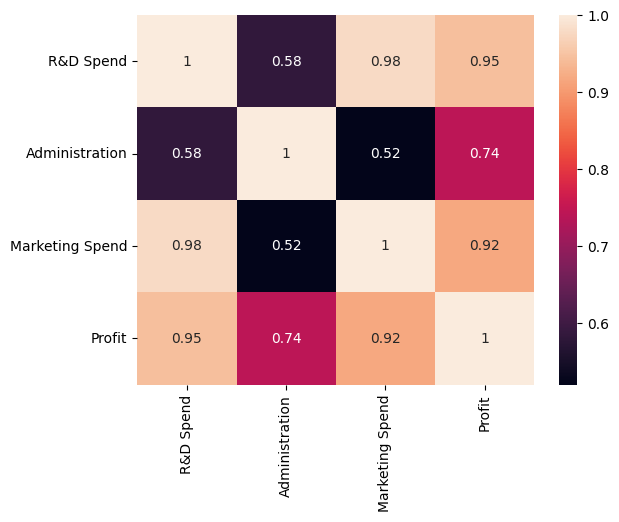

In [80]:
# Data visualization
# Building the correlation matrix

# Remove non-numeric columns before correlation
sns.heatmap(companies.drop('State', axis=1).corr(), annot=True)

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder ONLY to the "State" column (index 3)
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), [3])],
    remainder='passthrough'
)

X = ct.fit_transform(companies.iloc[:, :-1].values)


In [82]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
# Fitting Multiple linear regression to the Training set
from sklearn.linear_model import LinearRegression
model_fit = LinearRegression()
model_fit.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
# Predicting the Test set results
y_pred = model_fit.predict(X_test)
print(y_pred)

[ 89790.61532916  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719687
 164597.05380606  53222.82667402  66950.1905099  150566.43987004
 126915.20858596  59337.85971051 177513.91053061  75316.28143051
 118248.14406603 164574.40699901 170937.2898107  182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772747  53831.07669091  56881.41475225
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649623  63969.95996744 108857.91214126
 186014.72531987 171442.64130747 174644.26529204 117671.49128195
  96731.37857434 165452.25779409 107724.34331255  50194.54176914
 116513.89532179  58632.48986821 158416.46827609  78541.4852161
 159727.66671743 131137.87699644 184880.70924515 174609.08266879
  93745.66352059  78341.13383418 180745.90439079  84461.61490552
 142900.90602902 170618.44098396  84365.09530839 105307.3716218
 141660.07290786  52527.3434

In [85]:
# calculating the coefficients
print(model_fit.coef_)

[-8.80536598e+02 -6.98169073e+02  5.25845857e-01  8.44390881e-01
  1.07574255e-01]


In [86]:
# Calculating the intercepts
print(model_fit.intercept_)

-51035.22972403464


In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9112695892268834


## Logistic Regression
- It is a classification algorithm used to predict binary outcomes for a given set of independent variables. The dependent variable outcome is discrete.

- The math behind logistic regression
    - Odds (θ) = Probability of an event happening /Probability of an event not happening 
    - ⟹ θ = $\frac{p}{1-p}$
    - The value of odds range from 0 to ∞ 
    - The value of probability changes from to 0 to 1

    - Take the equation of a straight line ⟹ y = β₀ + β₁×x 
    - Now we predict the odds of success 
    $$\log{\frac{p(x)}{1-p(x)}} = β_0 + β_1× x$$

    - Exponentiating both sides
    $$ \frac{p(x)}{1-p(x)} = e^{β_0 + β_1× x}$$

    - Let $Y= e^{β_0 + β_1× x}$
    - Then $\frac{p(x)}{1-p(x)} = Y$
    - Then $p(x) = \frac{e^{β_0 + β_1× x}}{1+e^{β_0 + β_1× x}}$

    - The equation of a sigmoid function
    $$p(x) = \frac{e^{β_0 + β_1× x}}{1+e^{β_0 + β_1× x}}$$
    ⟹ $$p(x) = \frac{1}{1+e^{-(β_0 + β_1× x)}}$$

- Logistic Regression is used to solve Classification Problems.
- The response variable is categorical in nature.
- It helps calculate the possibility of a particular event taking place
- It also identifies the different components that are present in the image, and helps catagorize them.

### Use Case - Predicting Numbers

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [2]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


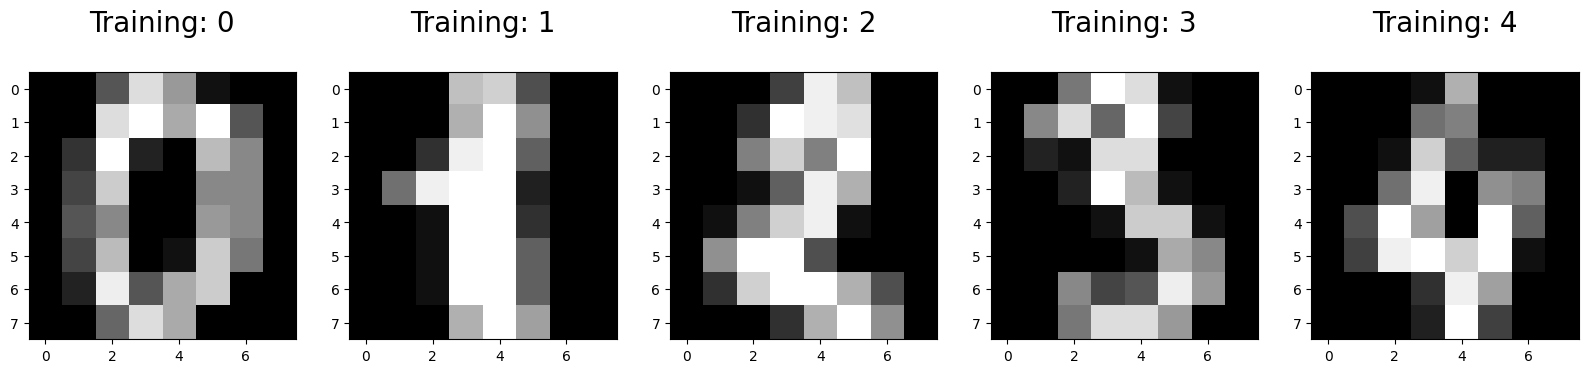

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap= plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2) 

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1383, 64)
(414, 64)
(1383,)
(414,)


In [11]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression(max_iter=10000)
logisticReg.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [13]:
# Returns a numpy array
# Predict for one Observation
print(logisticReg.predict([x_test[0]]))

[4]


In [19]:
for i in range(10):
    print(logisticReg.predict([x_test[i]]))

[4]
[0]
[9]
[1]
[8]
[7]
[1]
[5]
[1]
[6]


In [20]:
predictions = logisticReg.predict(x_test)   

score = logisticReg.score(x_test, y_test)
print(score)

0.9516908212560387


In [21]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  0  1]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

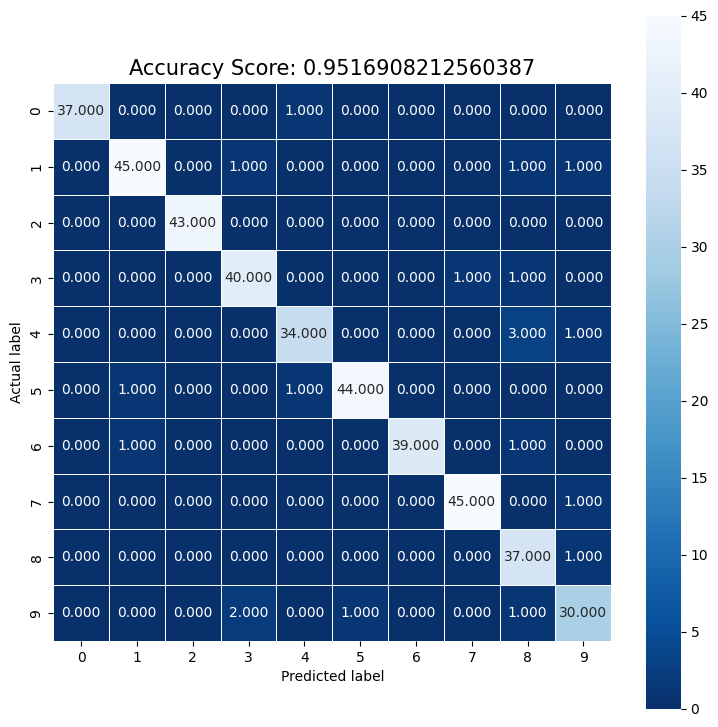

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
all_sample_title = 'Accuracy Score: {0}'.format(score)  
plt.title(all_sample_title, size = 15)

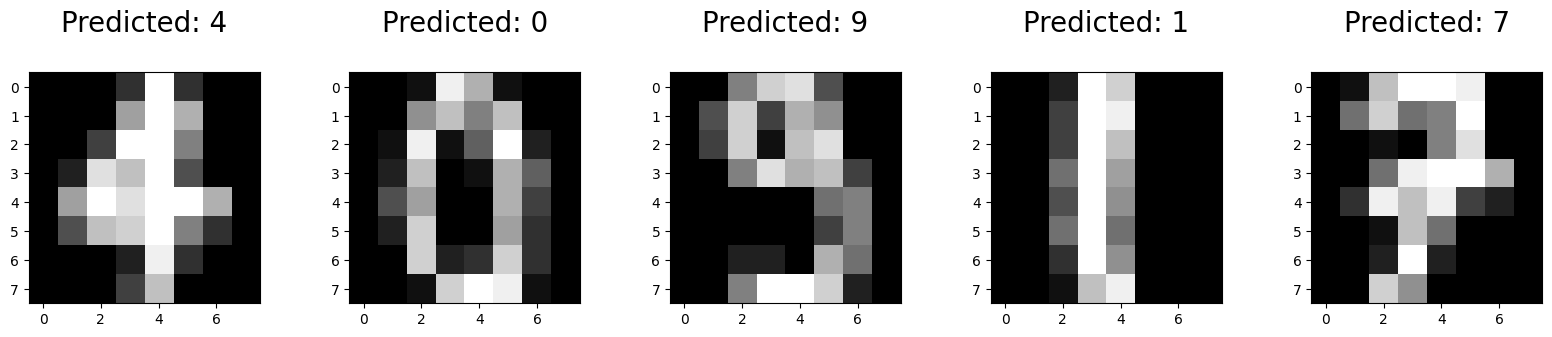

In [25]:
index = 0
classifiedIndex = []

for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))
for plotindex, wrong in enumerate(classifiedIndex[0:5]):
    plt.subplot(1,5,plotindex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap= plt.cm.gray)
    plt.title("Predicted: %i\n" % predictions[wrong], fontsize = 20)